In [1]:
import os
import numpy as np
from scipy.misc import imread
import pandas as pd
import matplotlib.pyplot as plt
import glob
from linear_model_MOM import *

### Test using tiny_imagenet database (4Mb of image used, the whole dataset weight 400Mb) that can be found https://tiny-imagenet.herokuapp.com/ or I could put it on the git.

In [2]:
f=imread('tiny_imagenet/n01443537/images/n01443537_0.JPEG')

In [3]:
np.shape(f)

(64, 64, 3)

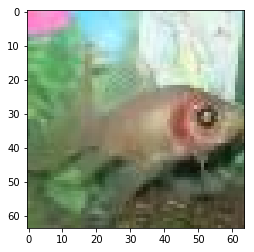

In [4]:
plt.imshow(f)
plt.show()

In [5]:
p=imread('tiny_imagenet/n02056570/images/n02056570_42.JPEG')

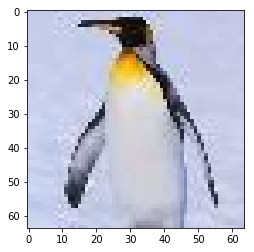

In [6]:
plt.imshow(p)
plt.show()

## Test tensorflow

In [7]:
from cnn_mom import CNN_MOM
files=glob.glob('tiny_imagenet/n01443537/images/*.JPEG')+glob.glob('tiny_imagenet/n02056570/images/*.JPEG')
y=np.hstack([np.ones(500),np.zeros(500)])
perm=np.random.permutation(1000)
y=y[perm]
files=np.array(files)[perm]
y=np.array(y)
train=list(range(int(9*len(y)/10)))
test=list(range(int(9*len(y)/10),len(y)))

In [8]:
import time
a=time.time()
clf=CNN_MOM(K=3,channels=[16,32],final_layer_shape=80,learning_rate=1e-3,beta=1e-2,epochs=250,epoch_count=50,regex=False)
clf.fit(files[train],y[train])
pred=clf.predict(files[test])
print(time.time()-a,'s')
print("Resultat : ",np.mean(y[test]==pred))

Epoch: 1 cost = 0.699  en environ  3.5674924850463867 s
Epoch: 51 cost = 0.274  en environ  179.23703980445862 s
Epoch: 101 cost = 0.153  en environ  354.52179408073425 s
Epoch: 151 cost = 0.132  en environ  531.0883674621582 s
Epoch: 201 cost = 0.101  en environ  705.9834973812103 s
Weights saved in graph_cnn.tf
INFO:tensorflow:Restoring parameters from graph_cnn.tf
886.8280429840088 s
Resultat :  0.96


### Résultats variant entre 0.93 et 0.99. Il faudrait augmenter epoch pour avoir des résultats plus stable et meilleurs (mais en plus de temps)

In [12]:
from mlp_mom_tf import mlp_MOM_image
a=time.time()
clf=mlp_MOM_image((200,80),K=3,learning_rate=5e-4,beta=2e-3,epochs=1500,epoch_count=300,regex=False)
clf.fit(files[train],y[train])
pred=clf.predict(files[test])
print(time.time()-a,'s')
print("Resultat : ",np.mean(y[test]==pred))

Epoch: 1 cost = 1.602  en environ  0.6510310173034668 s
Epoch: 301 cost = 0.133  en environ  187.99509572982788 s
Epoch: 601 cost = 0.107  en environ  376.6070921421051 s
Epoch: 901 cost = 0.174  en environ  563.6848247051239 s
Epoch: 1201 cost = 0.069  en environ  750.7798163890839 s
Weights saved in graph_mlp.tf
INFO:tensorflow:Restoring parameters from graph_mlp.tf
939.2683327198029 s
Resultat :  0.92


## Essai avec outliers et comparaison a cnn normal

### Comparaison CNN

In [10]:

from cnn import CNN
a=time.time()
clf=CNN(channels=[16,32],final_layer_shape=80,learning_rate=1e-3,beta=1e-2,epochs=250,epoch_count=50,regex=False)
clf.fit(files[train],y[train])
pred=clf.predict(files[test])
print(time.time()-a,'s')
print("Resultat : ",np.mean(y[test]==pred))

Epoch: 1 cost = 0.699  en environ  5.466879844665527 s
Epoch: 51 cost = 0.208  en environ  249.84086060523987 s
Epoch: 101 cost = 0.138  en environ  489.4436066150665 s
Epoch: 151 cost = 0.085  en environ  730.4445424079895 s
Epoch: 201 cost = 0.074  en environ  975.5301501750946 s
Weights saved in graph_cnn.tf
INFO:tensorflow:Restoring parameters from graph_cnn.tf
1213.184609413147 s
Resultat :  0.94


### Pas de perte de perf à priori mais il faudrait augmenter le nombre d'epoch et peut être une validation croisée (ou une boite à moustache sur les scores correspondant à plusieurs jets de l'algo ci dessus) pour vraiment comparer.

### Gain de temps à faire mom cnn. Gain de temps et pas de perte de perf (à vérifier sur plusieurs autres cas). Regardons maintenant pour K plus grand pour avoir gain de temps encore plus gros (même si la bdd est "petite" pour un réseau de neuronnes donc on peut pas non plus prendre K énorme).

In [9]:
a=time.time()
clf=CNN_MOM(K=10,channels=[16,32],final_layer_shape=80,learning_rate=1e-3,beta=1e-2,epochs=250,epoch_count=50,regex=False)
clf.fit(files[train],y[train])
pred=clf.predict(files[test])
print(time.time()-a,'s')
print("Resultat : ",np.mean(y[test]==pred))

Epoch: 1 cost = 0.699  en environ  2.522101640701294 s
Epoch: 51 cost = 0.249  en environ  126.61403203010559 s
Epoch: 101 cost = 0.197  en environ  249.6293649673462 s
Epoch: 151 cost = 0.221  en environ  372.12046933174133 s
Epoch: 201 cost = 0.144  en environ  495.26307368278503 s
Weights saved in graph_cnn.tf
INFO:tensorflow:Restoring parameters from graph_cnn.tf
621.0213520526886 s
Resultat :  0.92


### Pour pousser plus loin cette étude il faudrait aussi regarder la taille des batch qu'ici j'ai prise égale à 1000 (valeur par défaut de l'argeument batch_size) mais pour une bdd plus grande, la valeur de K devrait être couplée à la valeur de batch_size.

### Gain de temps substantiel qui pourrait être très intéressant même quand la base de donnée n'est pas corrompue.

### BDD corrompue : ajout de 7 grenouilles parmis les pingouins.

In [8]:
outliers=['tiny_imagenet/n01641577/images/n01641577_'+str(f)+'.JPEG' for f in range(1,11)]
files=glob.glob('tiny_imagenet/n01443537/images/*.JPEG')+glob.glob('tiny_imagenet/n02056570/images/*.JPEG')+outliers
y=np.hstack([np.ones(500),np.zeros(510)])
perm=np.random.permutation(1010)
y=y[perm]
files=np.array(files)[perm]
y=np.array(y)
train=list(range(int(9*len(y)/10)))
test=list(range(int(9*len(y)/10),len(y)))

In [9]:
print('CNN MOM')

a=time.time()
clf=CNN_MOM(K=15,channels=[16,32],final_layer_shape=80,learning_rate=1e-3,beta=1e-2,epochs=250,epoch_count=50,regex=False)
clf.fit(files[train],y[train])
pred=clf.predict(files[test])
print(time.time()-a,'s')
print("Resultat : ",np.mean(y[test]==pred))


CNN MOM
Epoch: 1 cost = 0.699  en environ  2.1789393424987793 s
Epoch: 51 cost = 0.293  en environ  128.37700629234314 s
Epoch: 101 cost = 0.262  en environ  253.2157483100891 s
Epoch: 151 cost = 0.171  en environ  374.87193536758423 s
Epoch: 201 cost = 0.175  en environ  494.2010636329651 s
Weights saved in graph_cnn.tf
INFO:tensorflow:Restoring parameters from graph_cnn.tf
615.6685910224915 s
Resultat :  0.950495049505


In [10]:
print('CNN')
from cnn import CNN
a=time.time()
clf=CNN(channels=[16,32],final_layer_shape=80,learning_rate=1e-3,beta=1e-2,epochs=250,epoch_count=50,regex=False)
clf.fit(files[train],y[train])
pred=clf.predict(files[test])
print(time.time()-a,'s')
print("Resultat : ",np.mean(y[test]==pred))

CNN
Epoch: 1 cost = 0.699  en environ  4.629974603652954 s
Epoch: 51 cost = 0.693  en environ  253.97641563415527 s
Epoch: 101 cost = 0.693  en environ  516.384443283081 s
Epoch: 151 cost = 0.693  en environ  770.5073761940002 s
Epoch: 201 cost = 0.693  en environ  1024.6017651557922 s
Weights saved in graph_cnn.tf
INFO:tensorflow:Restoring parameters from graph_cnn.tf
1257.9526407718658 s
Resultat :  0.514851485149
